Question 02: Please download suitable dataset from Kaggle, GitHub or UCI Machine Learning
repository. Represent all major data preprocessing techniques in python like removing
missing values, Column transformation, removing outliers, drop duplicates, data
integration and data reduction.

In [166]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [158]:
dataset = pd.read_csv('top_english_movies.csv')

### Removing Missing Values

In [30]:
print(dataset.isnull().sum())

no.             0
movie_name      2
movie_year      2
movie_rating    0
user_votes      2
dtype: int64


In [73]:
print(dataset)

     no.                movie_name  movie_year  movie_rating user_votes
0      0  The Shawshank Redemption      1994.0           9.3       2.8M
1      1             The Godfather         NaN           9.2         2M
2      2           The Dark Knight      2008.0           9.0        NaN
3      3     The Godfather Part II      1974.0           9.0       1.3M
4      4              12 Angry Men      1957.0           9.0       839K
..   ...                       ...         ...           ...        ...
245  245                12 Monkeys      1995.0           8.0       638K
246  246                  Papillon      1973.0           8.0       136K
247  247             Blood Diamond      2006.0           8.0       575K
248  248         Blade Runner 2049      2017.0           8.0       631K
249  249                       Her      2013.0           8.0       651K

[250 rows x 5 columns]


In [74]:
print(dataset.dropna())

     no.                movie_name  movie_year  movie_rating user_votes
0      0  The Shawshank Redemption      1994.0           9.3       2.8M
3      3     The Godfather Part II      1974.0           9.0       1.3M
4      4              12 Angry Men      1957.0           9.0       839K
5      5          Schindler's List      1993.0           9.0       1.4M
6      6     The Lord of the Rings      2003.0           9.0       1.9M
..   ...                       ...         ...           ...        ...
245  245                12 Monkeys      1995.0           8.0       638K
246  246                  Papillon      1973.0           8.0       136K
247  247             Blood Diamond      2006.0           8.0       575K
248  248         Blade Runner 2049      2017.0           8.0       631K
249  249                       Her      2013.0           8.0       651K

[244 rows x 5 columns]


### Column Transformation

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [92]:
from sklearn.preprocessing import OneHotEncoder

In [122]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse= False, drop= 'first'),[0])],remainder="passthrough")

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset.drop(columns=['no.']),dataset['no.'],
                                                test_size=0.2)

In [124]:
ct.fit_transform(X_train)

D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.0, 0.0, 0.0, ..., 1999.0, 8.6, '1.4M'],
       [0.0, 0.0, 0.0, ..., 2002.0, 8.5, '885K'],
       [0.0, 0.0, 0.0, ..., 1969.0, 8.0, '224K'],
       ...,
       [0.0, 0.0, 0.0, ..., 1967.0, 8.0, '284K'],
       [0.0, 0.0, 0.0, ..., 2009.0, 8.1, '303K'],
       [0.0, 1.0, 0.0, ..., 1971.0, 8.3, '864K']], dtype=object)

### Removing Outliers

In [127]:
import matplotlib.pyplot as plt

In [131]:
%matplotlib inline

(array([55., 69., 36., 28., 19., 17.,  7.,  0.,  6.,  5.,  1.,  5.,  0.,
         1.,  1.]),
 array([8.        , 8.08666667, 8.17333333, 8.26      , 8.34666667,
        8.43333333, 8.52      , 8.60666667, 8.69333333, 8.78      ,
        8.86666667, 8.95333333, 9.04      , 9.12666667, 9.21333333,
        9.3       ]),
 <BarContainer object of 15 artists>)

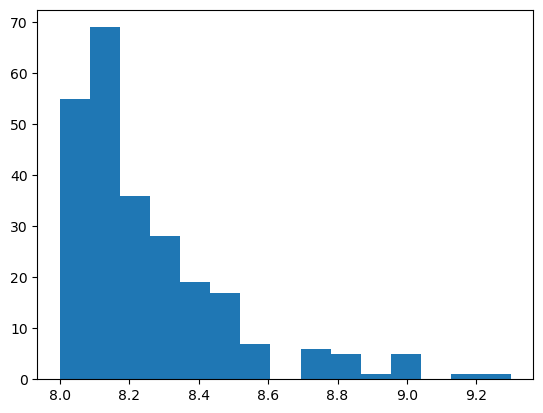

In [135]:
plt.hist(dataset['movie_rating'],bins=15)

In [142]:
lowerLimit = dataset['movie_rating'].quantile(0.25) 
upperLimit = dataset['movie_rating'].quantile(0.75)

In [143]:
lowerLimit, upperLimit

(8.1, 8.3)

In [146]:
# find the outliers
dataset.loc[(dataset['movie_rating'] > lowerLimit) | (dataset['movie_rating'] < upperLimit)]

,no.,movie_name,movie_year,movie_rating,user_votes
0,0,The Shawshank Redemption,1994.0,9.3,2.8M
1,1,The Godfather,NaN,9.2,2M
2,2,The Dark Knight,2008.0,9.0,NaN
3,3,The Godfather Part II,1974.0,9.0,1.3M
4,4,12 Angry Men,1957.0,9.0,839K
...,...,...,...,...,...
245,245,12 Monkeys,1995.0,8.0,638K
246,246,Papillon,1973.0,8.0,136K
247,247,Blood Diamond,2006.0,8.0,575K
248,248,Blade Runner 2049,2017.0,8.0,631K


In [150]:
# Delete the outlier data
new_dataset = dataset.loc[(dataset['movie_rating'] <= upperLimit) & (dataset['movie_rating'] >= lowerLimit)]
print('Before removing outliers:', len(dataset))
print('After removing outliers:',len(new_dataset))
print('Outliers:', len(dataset)-len(new_dataset))

Before removing outliers: 250
After removing outliers: 133
Outliers: 117


(array([69.,  0.,  0.,  0.,  0.,  0.,  0., 36.,  0.,  0.,  0.,  0.,  0.,
         0., 28.]),
 array([8.1       , 8.11333333, 8.12666667, 8.14      , 8.15333333,
        8.16666667, 8.18      , 8.19333333, 8.20666667, 8.22      ,
        8.23333333, 8.24666667, 8.26      , 8.27333333, 8.28666667,
        8.3       ]),
 <BarContainer object of 15 artists>)

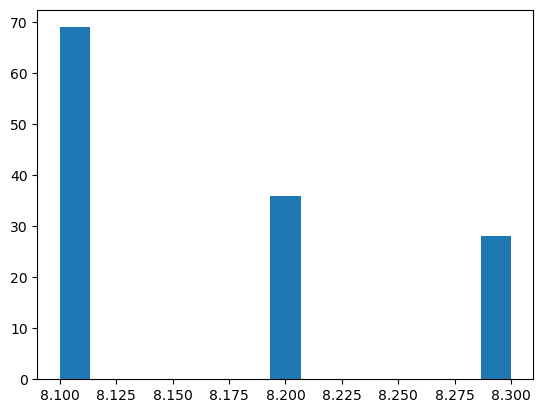

In [151]:
plt.hist(new_dataset['movie_rating'],bins=15)

### Drop Duplicates

In [159]:
print(dataset)

     no.                movie_name  movie_year  movie_rating user_votes
0      0  The Shawshank Redemption      1994.0           9.3       2.8M
1      1             The Godfather         NaN           9.2         2M
2      2           The Dark Knight      2008.0           9.0        NaN
3      3     The Godfather Part II      1974.0           9.0       1.3M
4      3     The Godfather Part II      1974.0           9.0       1.3M
..   ...                       ...         ...           ...        ...
245  245                12 Monkeys      1995.0           8.0       638K
246  246                  Papillon      1973.0           8.0       136K
247  247             Blood Diamond      2006.0           8.0       575K
248  248         Blade Runner 2049      2017.0           8.0       631K
249  249                       Her      2013.0           8.0       651K

[250 rows x 5 columns]


In [160]:
dataset.drop_duplicates()

,no.,movie_name,movie_year,movie_rating,user_votes
0,0,The Shawshank Redemption,1994.0,9.3,2.8M
1,1,The Godfather,NaN,9.2,2M
2,2,The Dark Knight,2008.0,9.0,NaN
3,3,The Godfather Part II,1974.0,9.0,1.3M
5,5,Schindler's List,1993.0,9.0,1.4M
...,...,...,...,...,...
245,245,12 Monkeys,1995.0,8.0,638K
246,246,Papillon,1973.0,8.0,136K
247,247,Blood Diamond,2006.0,8.0,575K
248,248,Blade Runner 2049,2017.0,8.0,631K


### Data Integration

In [169]:
dataset1 = pd.read_csv('top_english_movies.csv')

In [170]:
dataset2 = pd.read_csv('top_english_movies2.csv')

In [171]:
display(dataset1,dataset2)

,no.,movie_name,movie_year,movie_rating,user_votes
0,0,The Shawshank Redemption,1994.0,9.3,2.8M
1,1,The Godfather,NaN,9.2,2M
2,2,The Dark Knight,2008.0,9.0,NaN
3,3,The Godfather Part II,1974.0,9.0,1.3M
4,3,The Godfather Part II,1974.0,9.0,1.3M
...,...,...,...,...,...
245,245,12 Monkeys,1995.0,8.0,638K
246,246,Papillon,1973.0,8.0,136K
247,247,Blood Diamond,2006.0,8.0,575K
248,248,Blade Runner 2049,2017.0,8.0,631K


,no.,movie_name,movie_year,movie_rating,user_votes
0,0,The Shawshank Redemption,1994.0,9.3,2.8M
1,1,The Godfather,NaN,9.2,2M
2,2,The Dark Knight,2008.0,9.0,NaN
3,4,The Godfather Part I,1974.0,9.0,1.3M
4,3,The Godfather Part II,1974.0,9.0,1.3M
...,...,...,...,...,...
245,245,12 Monkeys,1995.0,8.0,638K
246,246,Papillon,1973.0,8.0,136K
247,247,Blood Diamond,2006.0,8.0,575K
248,248,Blade Runner 2049,2017.0,8.0,631K


In [174]:
datasetIntersct = pd.merge(dataset1,dataset2)

In [175]:
print(datasetIntersct)

     no.                movie_name  movie_year  movie_rating user_votes
0      0  The Shawshank Redemption      1994.0           9.3       2.8M
1      1             The Godfather         NaN           9.2         2M
2      2           The Dark Knight      2008.0           9.0        NaN
3      3     The Godfather Part II      1974.0           9.0       1.3M
4      3     The Godfather Part II      1974.0           9.0       1.3M
..   ...                       ...         ...           ...        ...
245  245                12 Monkeys      1995.0           8.0       638K
246  246                  Papillon      1973.0           8.0       136K
247  247             Blood Diamond      2006.0           8.0       575K
248  248         Blade Runner 2049      2017.0           8.0       631K
249  249                       Her      2013.0           8.0       651K

[250 rows x 5 columns]


In [176]:
dfUnion = pd.merge(dataset1,dataset2,how='outer')

In [177]:
dfUnion

,no.,movie_name,movie_year,movie_rating,user_votes
0,0,The Shawshank Redemption,1994.0,9.3,2.8M
1,1,The Godfather,NaN,9.2,2M
2,2,The Dark Knight,2008.0,9.0,NaN
3,3,The Godfather Part II,1974.0,9.0,1.3M
4,3,The Godfather Part II,1974.0,9.0,1.3M
...,...,...,...,...,...
246,246,Papillon,1973.0,8.0,136K
247,247,Blood Diamond,2006.0,8.0,575K
248,248,Blade Runner 2049,2017.0,8.0,631K
249,249,Her,2013.0,8.0,651K


In [178]:
dataset3 = pd.read_csv('netflix.csv')

In [179]:
joinData1_Data3 =dataset1.join(dataset3)

In [180]:
display(joinData1_Data3)

,no.,movie_name,movie_year,movie_rating,user_votes,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,The Shawshank Redemption,1994.0,9.3,2.8M,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,The Godfather,NaN,9.2,2M,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,The Dark Knight,2008.0,9.0,NaN,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,3,The Godfather Part II,1974.0,9.0,1.3M,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,3,The Godfather Part II,1974.0,9.0,1.3M,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,12 Monkeys,1995.0,8.0,638K,s246,TV Show,Korean Cold Noodle Rhapsody,NaN,Paik Jong-won,NaN,"August 20, 2021",2021,TV-PG,1 Season,"Docuseries, International TV Shows","Refreshing and flavorful, naengmyeon is Korea'..."
246,246,Papillon,1973.0,8.0,136K,s247,Movie,Man in Love,Yin Chen-hao,"Roy Chiu, Ann Hsu, Tsai Chen-nan, Chung Hsin-l...",NaN,"August 20, 2021",2021,TV-MA,115 min,"Dramas, International Movies, Romantic Movies",When he meets a debt-ridden woman who's caring...
247,247,Blood Diamond,2006.0,8.0,575K,s248,Movie,Sweet Girl,Brian Andrew Mendoza,"Jason Momoa, Isabela Merced, Manuel Garcia-Rul...",United States,"August 20, 2021",2021,R,110 min,"Action & Adventure, Dramas",He lost the love of his life to a pharmaceutic...
248,248,Blade Runner 2049,2017.0,8.0,631K,s249,TV Show,The Chair,NaN,"Sandra Oh, Jay Duplass, Holland Taylor, David ...",NaN,"August 20, 2021",2021,TV-MA,1 Season,"TV Comedies, TV Dramas","At a major university, the first woman of colo..."


### Data Reduction

In [191]:
dataset3 = pd.read_csv('netflix.csv')

In [192]:
display(dataset3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [193]:
dataset3.drop(['type', 'director', 'country', 'description', 'listed_in', 'cast'], axis=1, inplace=True)

In [194]:
display(dataset3)

,show_id,title,date_added,release_year,rating,duration
0,s1,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min
1,s2,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,Ganglands,"September 24, 2021",2021,TV-MA,1 Season
3,s4,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season
4,s5,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...
8802,s8803,Zodiac,"November 20, 2019",2007,R,158 min
8803,s8804,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons
8804,s8805,Zombieland,"November 1, 2019",2009,R,88 min
8805,s8806,Zoom,"January 11, 2020",2006,PG,88 min
